In [12]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

np.random.seed(12345)

In [2]:
# Function for loading the iris data
# load_data returns a 2D numpy array where each row is an example
#  and each column is a given feature.
def load_data():
    iris = datasets.load_iris()
    return iris.data

In [3]:
# Assign labels to each example given the center of each cluster
def assign_labels(X, centers):
    # Dictionary to store given X values to it's respective cluster
    clusters = {i: [] for i in range(len(centers))}
    # for each value in X calculate the distance from every center
    for index, value in enumerate(X):
        distances = []
        for center in centers:
            x = np.sqrt(np.sum(np.power((value - center), 2)))
            distances.append(x)
        # get the minimum distance for given X value comparing with all the centers
        assign_cluster = distances.index(min(distances))
        clusters[assign_cluster].append(value)
    return clusters

In [4]:
# Calculate the center of each cluster given the label of each example
def calculate_centers(X, labels):
    new_centers = np.ndarray(shape=(len(labels), X.shape[1]))
    label = labels
    # Calculate the mean distance of each cluster dataset
    for index, sample in label.items():
        temp_mean = []
        v = np.array(sample)
        if len(sample) == 0:
            a = X[np.random.choice(len(X), size=1)]
            temp_mean.append(a)
        else:
            temp_mean.append(sum(v) / len(sample))

        new_centers[index] = np.array(temp_mean)

    return new_centers

In [5]:
# Test if the algorithm has converged
# Should return a bool stating if the algorithm has converged or not.
def test_convergence(center, oldCenter):
    # Checks if the position of the new centroids have changed
    difference = (np.sum(np.subtract(center, oldCenter)) ** 2)
    converged = np.sqrt(difference)
    if converged != 0:
        return False
    else:
        return True

In [6]:
# Evaluate the preformance of the current clusters
# This function should return the total mean squared error of the given clusters
def evaluate_performance(X, labels, centers):
    label = labels
    mse = []
    for index, values in label.items():
        x = np.sum(np.subtract(values, centers[index]) ** 2)
        mse.append(x / len(values))
    return np.sum(mse)

In [7]:
# Algorithm for preforming K-means clustering on the give dataset
def k_means(X, K):
    # Generate random centroids based on the cluster size
    centroid = X[np.random.choice(len(X), size=K)]
    oldCentroids = 0
    perf = 0
    labels = 0
    while not test_convergence(centroid, oldCentroids):
        oldCentroids = np.copy(centroid)
        labels = assign_labels(X, centroid)
        centroid = calculate_centers(X, labels)
        perf = evaluate_performance(X, labels, centroid)
    return labels, perf

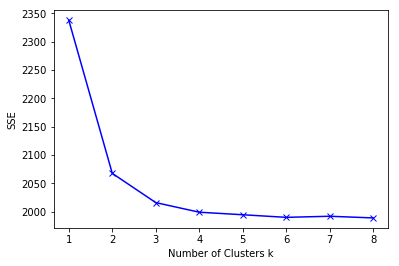

In [14]:
# Elbow Method to check for optimal clusters
def SSE(X, K):
    value = k_means(X, K)
    label = value[0]
    sse = []
    for idx, sample in label.items():
        x = np.sum(np.subtract(sample, np.mean(sample)) ** 2)
        sse.append(x)
    return np.sum(sse)


def elbow_method():
    x = load_data()
    sum_squared_dist = []
    K = range(1, 9)
    for k in K:
        km = SSE(x, k)
        sum_squared_dist.append(km)
    return sum_squared_dist

y = elbow_method()
x = range(1, 9)
plt.xlabel('Number of Clusters k')
plt.ylabel('SSE')
plt.plot(x, y, 'bx-')
plt.show()